In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
data=pd.read_csv("Iris.csv")

In [3]:
data

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [4]:
df=pd.DataFrame(data)
#id is not required for classification
del df["Id"]

In [5]:
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [8]:
import scipy.stats as stats

In [9]:
def visualise(df,col):
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='b')
    plt.hist(df[col],color = 'pink')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col],color = 'pink')
    
    plt.show()

 Statistical plots for : SepalLengthCm is shown ↓


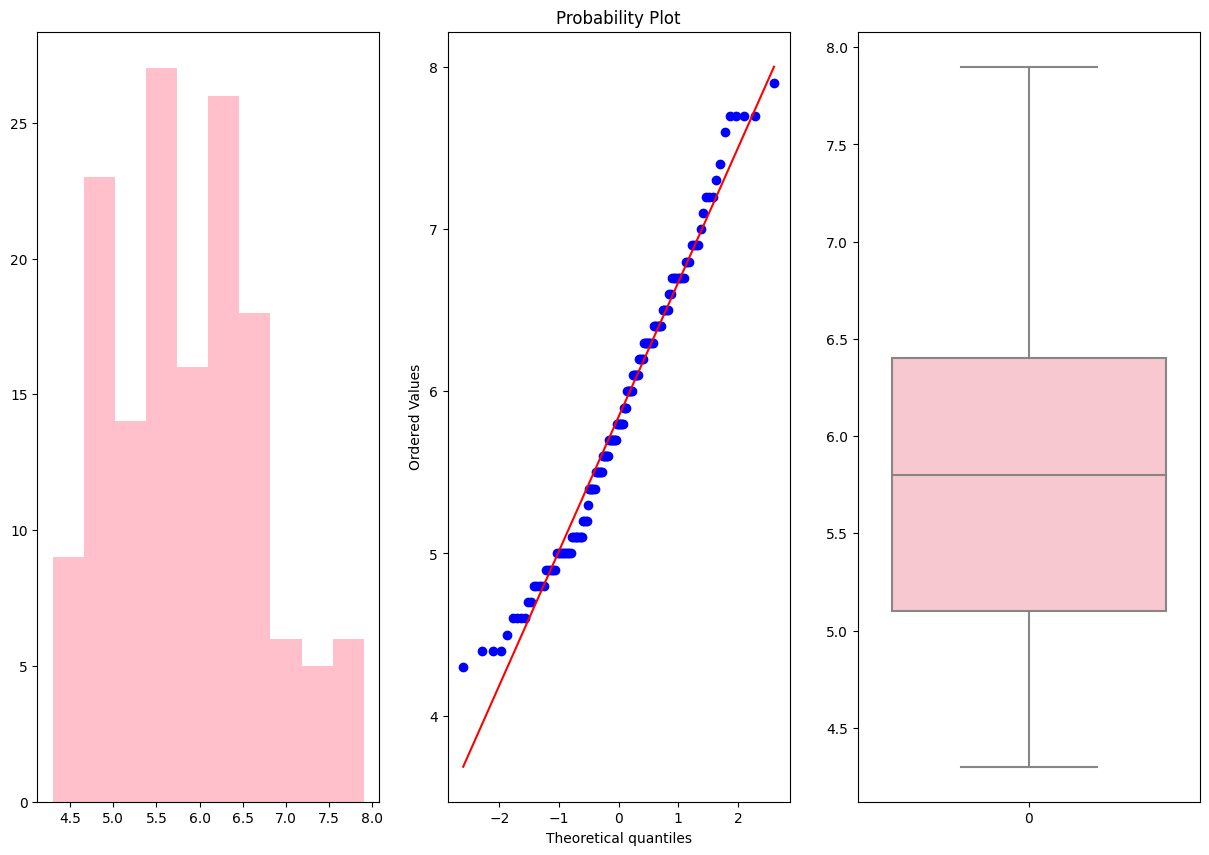

------------------------------------------------------------
 Statistical plots for : SepalWidthCm is shown ↓


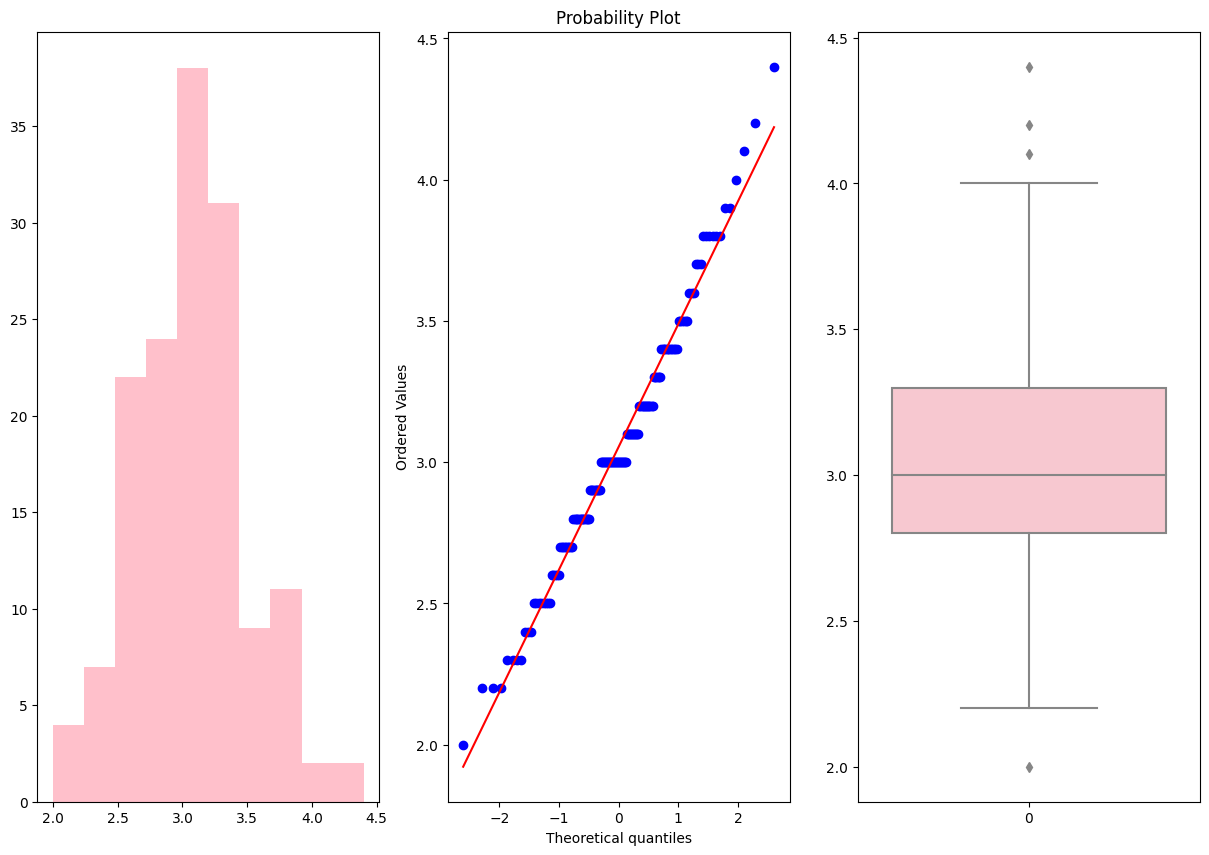

------------------------------------------------------------
 Statistical plots for : PetalLengthCm is shown ↓


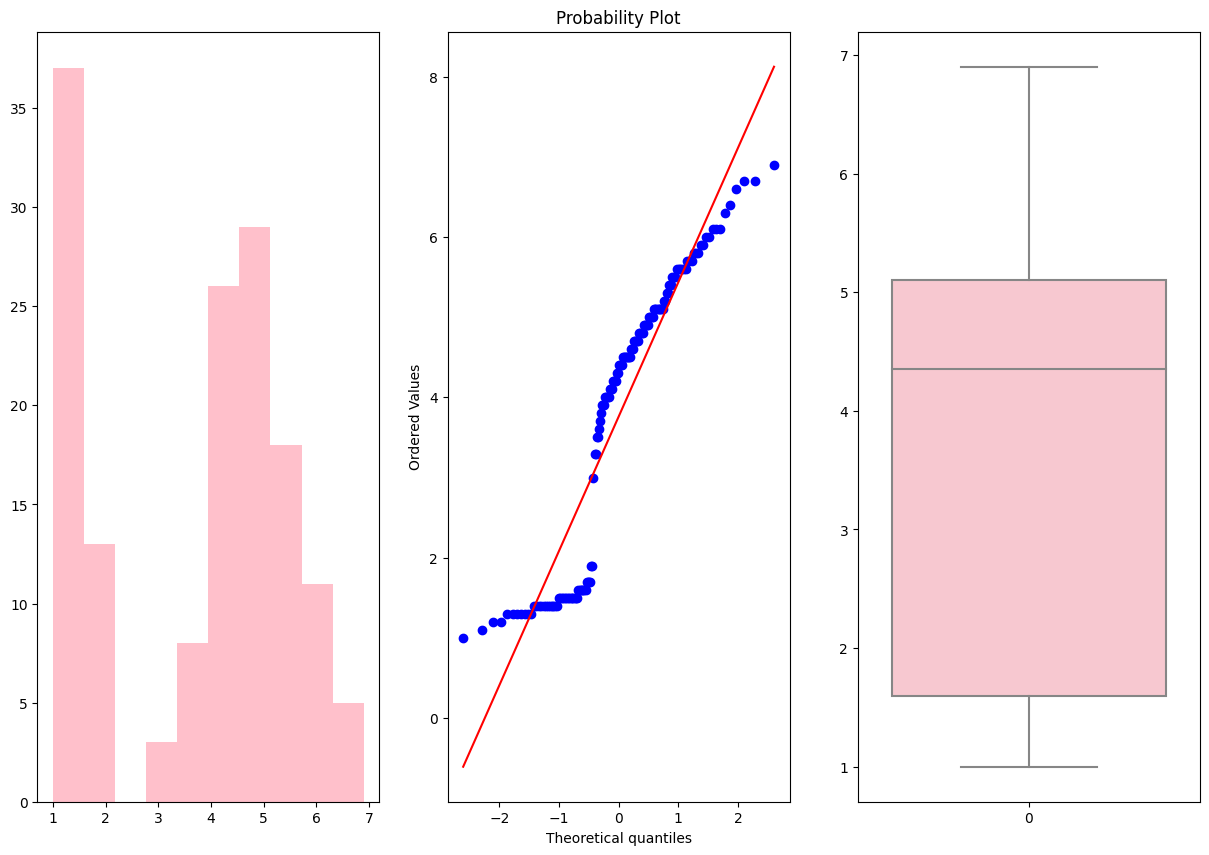

------------------------------------------------------------
 Statistical plots for : PetalWidthCm is shown ↓


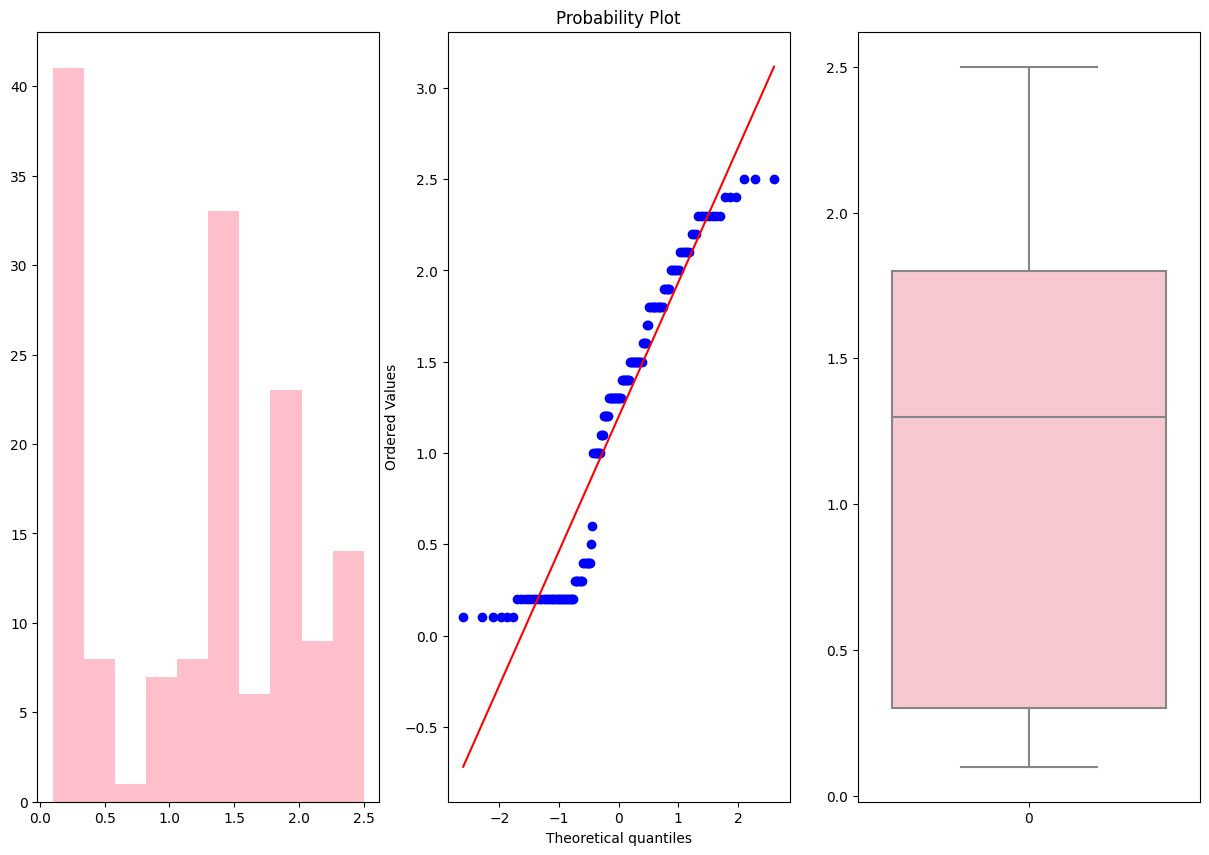

------------------------------------------------------------


In [10]:
for i in df.columns[:-1]:
    print(f' Statistical plots for : {i} is shown ↓')
    visualise(data,i)
    print("-"*60)

In [11]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [12]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
summary=pd.pivot_table(df,index=["Species"],aggfunc='mean')
summary

PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm
Species                                                                  
Iris-setosa              1.464         0.244          5.006         3.418
Iris-versicolor          4.260         1.326          5.936         2.770
Iris-virginica           5.552         2.026          6.588         2.974

In [15]:
fig=px.box(df,y='PetalLengthCm',points="all")
fig.show()

In [16]:
fig=px.box(df,y='PetalWidthCm',points="all")
fig.show()

In [17]:
fig=px.box(df,y='SepalLengthCm',points="all")
fig.show()

In [18]:
fig=px.box(df,y='SepalWidthCm',points="all")
fig.show()

In [19]:
#using iqr to remove outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
data_out=df[~((df<(q1-1.5*IQR)) |(df>(q3+1.5*IQR))).any(axis=1)]

C:\Users\Nikitha\AppData\Local\Temp\ipykernel_21816\272938215.py:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Nikitha\AppData\Local\Temp\ipykernel_21816\272938215.py:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Nikitha\AppData\Local\Temp\ipykernel_21816\272938215.py:5: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [20]:
data_out

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[146 rows x 5 columns]

In [21]:
data_out.corr()

C:\Users\Nikitha\AppData\Local\Temp\ipykernel_21816\2516618743.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.113977       0.879374      0.822577
SepalWidthCm       -0.113977      1.000000      -0.397123     -0.329782
PetalLengthCm       0.879374     -0.397123       1.000000      0.961755
PetalWidthCm        0.822577     -0.329782       0.961755      1.000000

In [22]:
data_out.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     146.000000    146.000000     146.000000    146.000000
mean        5.856849      3.036986       3.807534      1.219863
std         0.834093      0.395145       1.757117      0.760365
min         4.300000      2.200000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.400000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.000000       6.900000      2.500000

C:\Users\Nikitha\AppData\Local\Temp\ipykernel_21816\1155086450.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



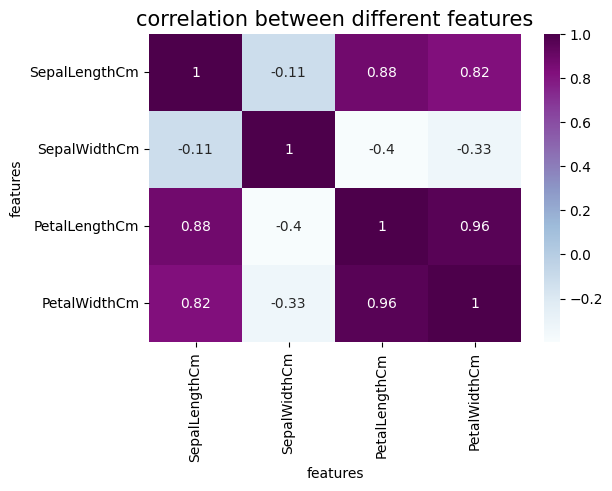

In [23]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
sns.heatmap(data_out.corr(),cmap="BuPu",annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('correlation between different features',fontsize=15,c='black')
plt.show()

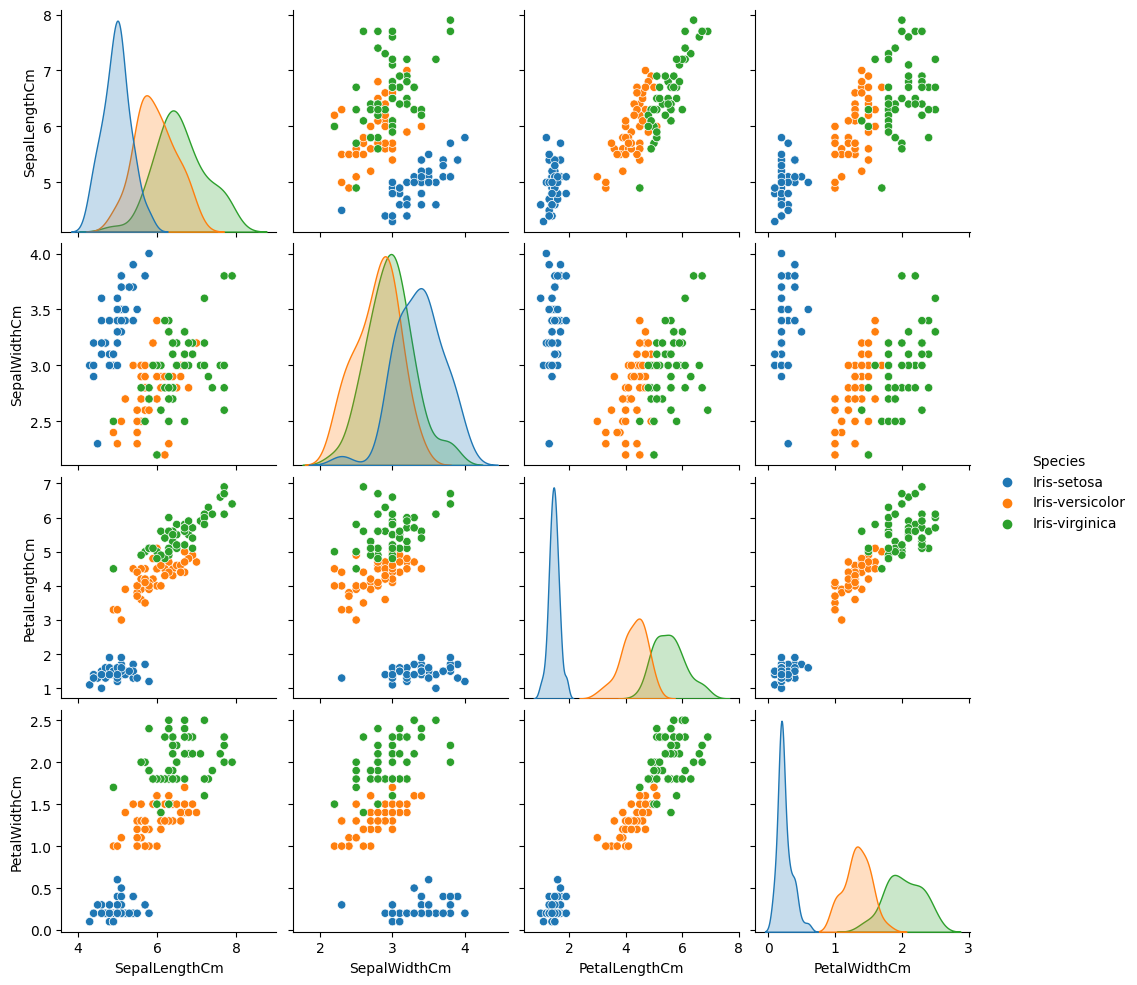

In [24]:
sns.pairplot(data_out,hue="Species")
plt.show()

In [25]:
features=data_out[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
target=data_out['Species']

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scale=scaler.fit_transform(features)
standardized_data=pd.DataFrame(data_scale,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
standardized_data

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0        -0.910515      1.175789      -1.374878     -1.345899
1        -1.151122     -0.093924      -1.374878     -1.345899
2        -1.391729      0.413961      -1.431986     -1.345899
3        -1.512032      0.160019      -1.317771     -1.345899
4        -1.030819      1.429732      -1.374878     -1.345899
..             ...           ...            ...           ...
141       1.014339     -0.093924       0.795200      1.425441
142       0.533125     -1.363637       0.680985      0.897567
143       0.773732     -0.093924       0.795200      1.029536
144       0.412822      0.921846       0.909414      1.425441
145       0.051912     -0.093924       0.738093      0.765598

[146 rows x 4 columns]

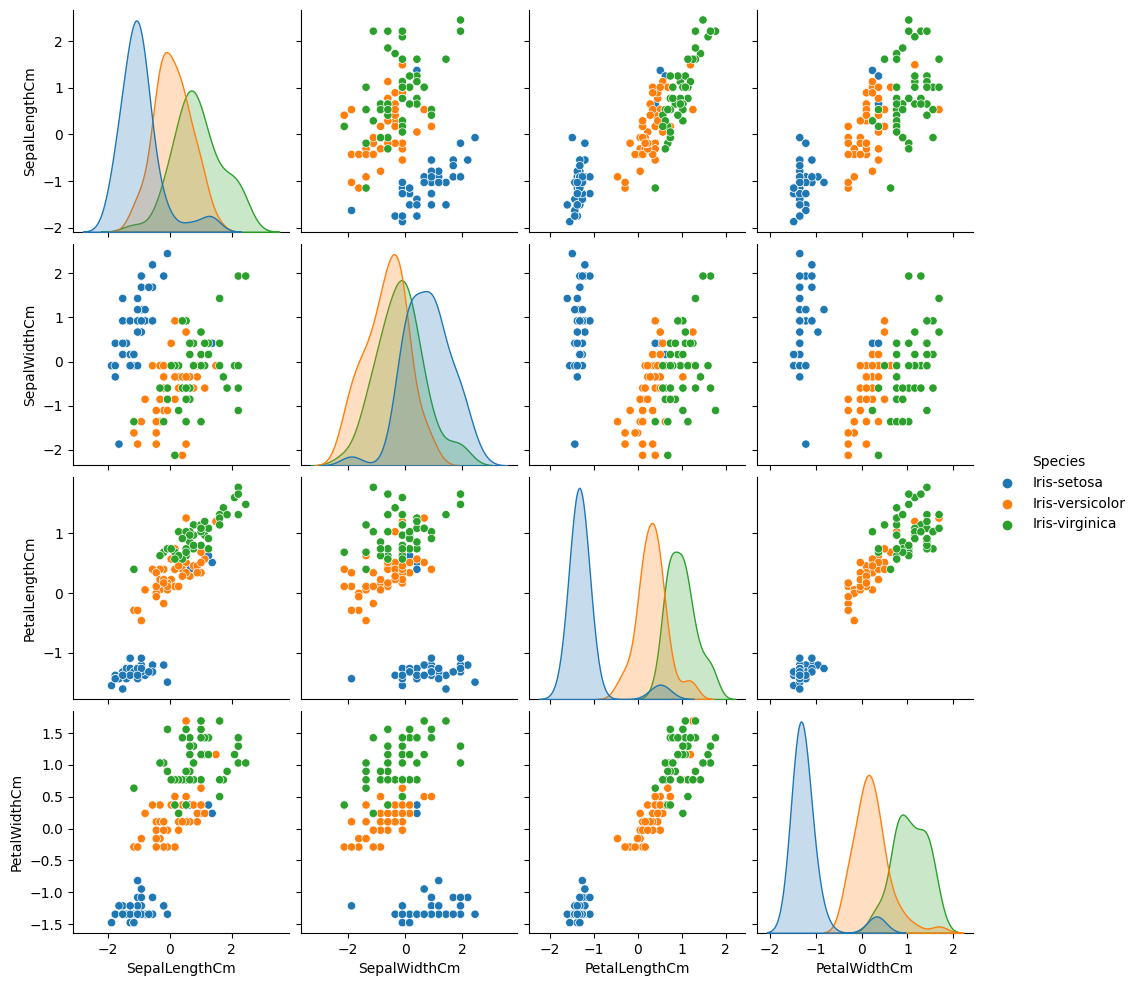

In [27]:
std_data=pd.concat([standardized_data,target],axis=1)
sns.pairplot(std_data,hue="Species")
plt.show()

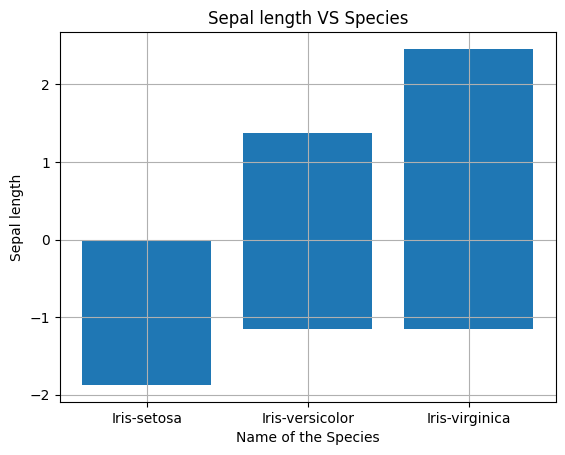

In [28]:
plt.bar(target,standardized_data['SepalLengthCm'])
plt.title("Sepal length VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal length")
plt.grid(True)
plt.show()

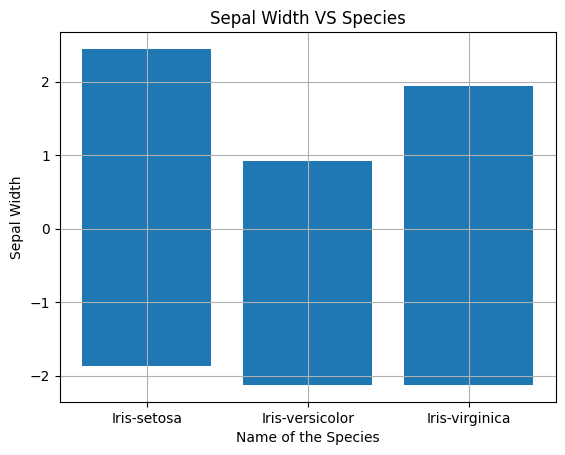

In [29]:
plt.bar(target,standardized_data['SepalWidthCm'])
plt.title("Sepal Width VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()

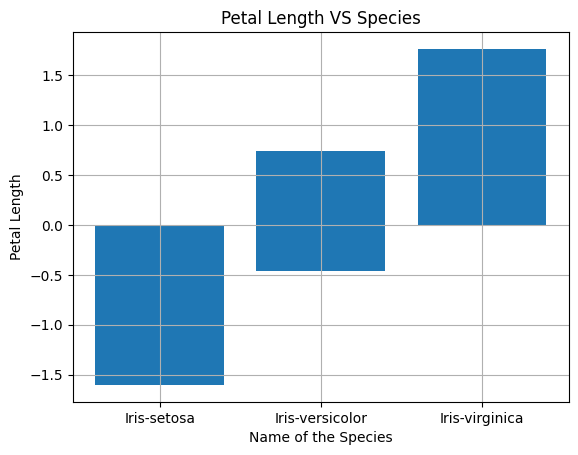

In [30]:
plt.bar(target,standardized_data['PetalLengthCm'])
plt.title("Petal Length VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Petal Length")
plt.grid(True)
plt.show()

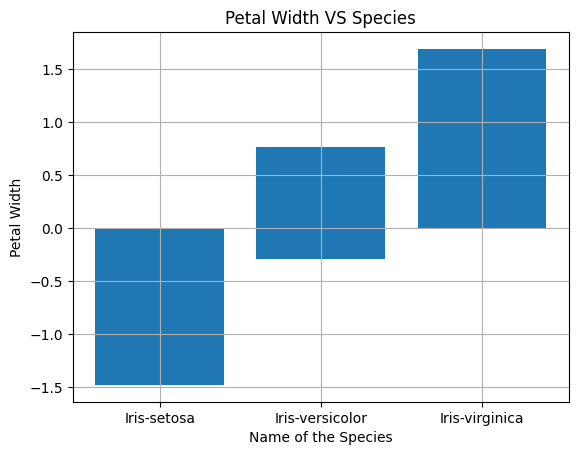

In [31]:
plt.bar(target,standardized_data['PetalWidthCm'])
plt.title("Petal Width VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Petal Width")
plt.grid(True)
plt.show()

In [32]:
X=standardized_data
Y=target

In [33]:
type(X)

pandas.core.frame.DataFrame

In [34]:
type(Y)

pandas.core.series.Series

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.24,random_state=20)

RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
x_test

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
51        0.773732     -0.601809       0.452556      0.369693
13       -1.872943     -0.093924      -1.546200     -1.477867
129       0.533125     -0.601809       0.738093      0.369693
122       0.412822     -0.601809       0.566771      0.765598
115       0.172215     -2.125465       0.680985      0.369693
21       -1.512032      1.429732      -1.603307     -1.345899
125       1.615856     -0.093924       1.137844      0.501661
28       -1.391729      0.413961      -1.260664     -1.345899
85       -0.429302     -1.363637       0.109912      0.105756
128       0.653429     -0.601809       1.023629      1.293473
34       -1.151122      0.160019      -1.317771     -1.477867
104       1.014339     -1.363637       1.137844      0.765598
133       0.653429      0.160019       0.966522      0.765598
100       0.773732     -0.093924       1.137844      1.293473
20       -0.910515      1.683674      -1.317771     -1.081961
95       -0.188695     -0.601809       0.167019      0.105756
50       -0.429302     -1.871522       0.109912      0.105756
46       -1.030819      0.667904      -1.374878     -1.345899
35       -1.752639     -0.093924      -1.431986     -1.345899
96        0.533125      0.667904       1.252058      1.689378
84       -0.308998     -0.093924       0.167019      0.105756
89       -1.030819     -1.871522      -0.289839     -0.290150
73        1.014339     -0.093924       0.680985      0.633630
91       -0.188695     -0.093924       0.224127     -0.026213
0        -0.910515      1.175789      -1.374878     -1.345899
49        1.254946      0.160019       0.623878      0.369693
11       -1.271426      0.921846      -1.260664     -1.345899
72        1.134642     -0.601809       0.566771      0.237724
114       2.217373     -1.109694       1.766024      1.425441
55        0.894035     -0.347867       0.452556      0.105756
102      -1.151122     -1.363637       0.395449      0.633630
74        0.172215     -0.347867       0.395449      0.369693
1        -1.151122     -0.093924      -1.374878     -1.345899
44       -1.512032      0.413961      -1.374878     -1.345899
117      -0.308998     -0.601809       0.623878      1.029536
47        1.375249      0.413961       0.509663      0.237724

In [38]:
predicted_values=random_forest.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn import metrics
x = metrics.accuracy_score(y_test,predicted_values)
print("Random Forest Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  91.66666666666666
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.75      0.86        12

       accuracy                           0.92        36
      macro avg       0.94      0.92      0.92        36
   weighted avg       0.93      0.92      0.92        36



Classification report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.75      1.00      0.86         9

       accuracy                           0.92        36
      macro avg       0.92      0.94      0.92        36
   weighted avg       0.94      0.92      0.92        36



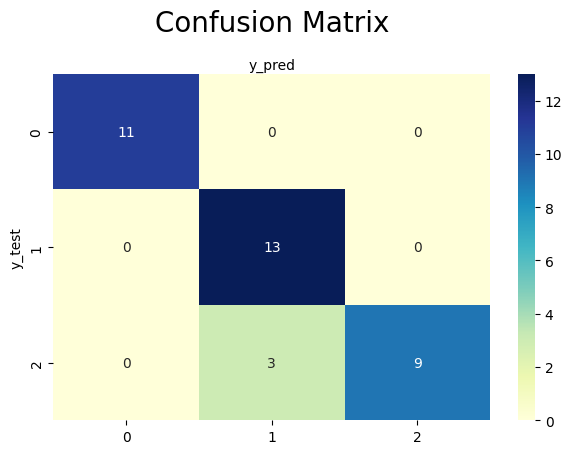

In [40]:
conf_matrix=confusion_matrix(y_test,predicted_values)
fig,ax = plt.subplots(figsize=(6,4))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', fontsize=20, y=1.1)
ax.set(xlabel='y_pred')
ax.set(ylabel='y_test')
print("Classification report :")
print(classification_report(predicted_values,y_test))

DECISION TREE

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn import metrics

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
predicted_values=decision_tree.predict(x_test)
x = metrics.accuracy_score(y_test,predicted_values)
print("Decision Tree Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values))

Decision Tree Accuracy is:  91.66666666666666
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.75      0.86        12

       accuracy                           0.92        36
      macro avg       0.94      0.92      0.92        36
   weighted avg       0.93      0.92      0.92        36



Classification report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.75      1.00      0.86         9

       accuracy                           0.92        36
      macro avg       0.92      0.94      0.92        36
   weighted avg       0.94      0.92      0.92        36



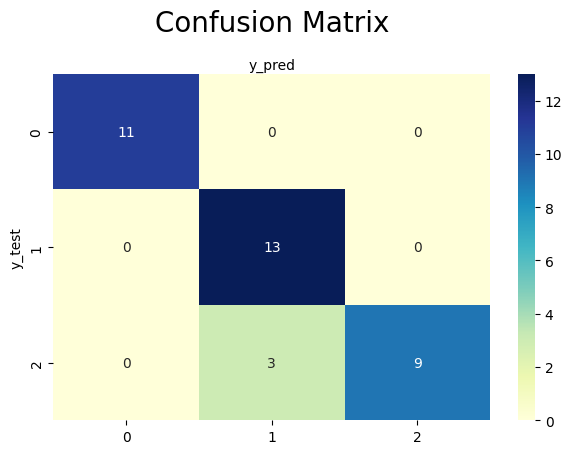

In [42]:
conf_matrix=confusion_matrix(y_test,predicted_values)
fig,ax = plt.subplots(figsize=(6,4))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', fontsize=20, y=1.1)
ax.set(xlabel='y_pred')
ax.set(ylabel='y_test')
print("Classification report :")
print(classification_report(predicted_values,y_test))

KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
predicted_values= classifier.predict(x_test)
x = metrics.accuracy_score(y_test,predicted_values)
print("Decision Tree Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values))

Decision Tree Accuracy is:  88.88888888888889
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.90      0.75      0.82        12

       accuracy                           0.89        36
      macro avg       0.90      0.89      0.89        36
   weighted avg       0.89      0.89      0.89        36



Classification report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      0.80      0.86        15
 Iris-virginica       0.75      0.90      0.82        10

       accuracy                           0.89        36
      macro avg       0.89      0.90      0.89        36
   weighted avg       0.90      0.89      0.89        36



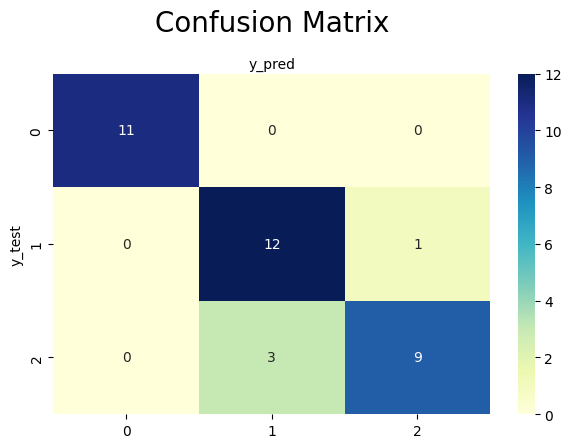

In [44]:
conf_matrix=confusion_matrix(y_test,predicted_values)
fig,ax = plt.subplots(figsize=(6,4))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', fontsize=20, y=1.1)
ax.set(xlabel='y_pred')
ax.set(ylabel='y_test')
print("Classification report :")
print(classification_report(predicted_values,y_test))